In [1]:
#import packages
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import scipy

In [2]:
#get data
data = pd.read_csv('movieReplicationSet.csv')

# Q1: 
Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies]

p-value: 0.0
Reject the null hypothesis: More popular movies are rated higher than less popular movies.


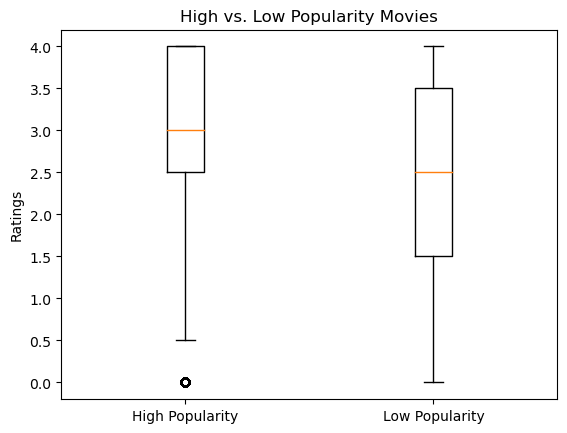

In [3]:
col = 400
rating_counts = np.array([])

for i in data.columns[:col]:
    column = data[i]
    count = column.count()
    rating_counts = np.append(rating_counts, count)

median = np.median(rating_counts)

highp_group = np.array([])
lowp_group = np.array([])

for i in data.columns[:col]:
    column = data[i]
    count = column.count()

    if count >= median:
        highp_group = np.append(highp_group, column.dropna().to_numpy())  # Append ratings for high popularity movies
    else:
        lowp_group = np.append(lowp_group, column.dropna().to_numpy())    # Append ratings for low popularity movies

pval = stats.mannwhitneyu(highp_group, lowp_group, alternative='greater')[1]

print("p-value:", pval)

alpha = 0.005
if pval < alpha:
    print("Reject the null hypothesis: More popular movies are rated higher than less popular movies.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ratings based on popularity.")

# plotting part
labels = ['High Popularity', 'Low Popularity']
data_highlow = [highp_group, lowp_group]
plt.boxplot(data_highlow, labels = labels)
plt.title("High vs. Low Popularity Movies")
plt.ylabel("Ratings")
plt.show()

# Q2: 
Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of release to contrast movies in terms of whether they are old or new]

In [4]:
col = 400
year_data = np.array([])

for i in data.columns[:col]:
    year = int(i[-5:-1])
    year_data = np.append(year_data, year)

median = np.median(year_data)

new_group = np.array([])
old_group = np.array([])

for i in data.columns[:col]:
    year = int(i[-5:-1])
    column = data[i]

    if year >= median:
        new_group = np.append(new_group, column.dropna().to_numpy())  # Append ratings for high popularity movies
    else:
        old_group = np.append(old_group, column.dropna().to_numpy())    # Append ratings for low popularity movies

pval = stats.mannwhitneyu(new_group, old_group, alternative='two-sided')[1]
print("p-value:", pval)

alpha = 0.005
if pval < alpha:
    print("Reject the null hypothesis: Newer movies are rated differently than movies that are older.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ratings based on year released.")

p-value: 1.2849216001533932e-06
Reject the null hypothesis: Newer movies are rated differently than movies that are older.


# Q3: 
Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

In [5]:
Q3_data = data.loc[:,['Shrek (2001)','Gender identity (1 = female; 2 = male; 3 = self-described)']]
Q3_data

,Shrek (2001),Gender identity (1 = female; 2 = male; 3 = self-described)
0,3.0,1.0
1,3.0,1.0
2,3.5,1.0
3,0.5,1.0
4,3.0,1.0
...,...,...
1092,3.0,1.0
1093,4.0,1.0
1094,3.5,1.0
1095,2.5,1.0


In [6]:
female = data[data.iloc[:, 474] == 1]['Shrek (2001)'].dropna()
male = data[data.iloc[:, 474] == 2]['Shrek (2001)'].dropna()
pval = stats.mannwhitneyu(female, male, alternative = 'two-sided')[1]

print("p-value:", pval)

alpha = 0.005
if pval < alpha:
    print("Reject the null hypothesis: Male and female viewers rate 'Shrek (2001)' differently.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ratings based on gender for 'Shrek (2001)'.")

p-value: 0.050536625925559006
Fail to reject the null hypothesis: No significant difference in ratings based on gender for 'Shrek (2001)'.


# Q4: 
What proportion of movies are rated differently by male and female viewers?

In [7]:
list_fm = []
count = 0
col = 400

for i in data.columns[:col]:
    female = data[data.iloc[:, 474] == 1][i].dropna()
    male = data[data.iloc[:, 474] == 2][i].dropna()
    pval = stats.mannwhitneyu(female, male, alternative = 'two-sided')[1]
    if pval < 0.005:
        list_fm.append(i)
        count += 1

print ("Movies exhibit a gender effect: ")
print (list_fm)
print ("Proportion of movies are rated differently by male and female viewers ", count/col)

Movies exhibit a gender effect: 
['Django Unchained (2012)', 'Alien (1979)', 'Fargo (1996)', 'Star Wars: Episode IV - A New Hope (1977)', 'Indiana Jones and the Raiders of the Lost Ark (1981)', 'The Lost World: Jurassic Park (1997)', '13 Going on 30 (2004)', 'Inglorious Bastards (2009)', 'Clueless (1995)', 'The Exorcist (1973)', "Pirates of the Caribbean: Dead Man's Chest (2006)", 'Funny Girl (1968)', 'The Thing (1982)', 'Elf (2003)', 'Andaz Apna Apna (1994)', 'The Proposal (2009)', 'Girl Interrupted (1999)', 'Divine Secrets of the Ya-Ya Sisterhood (2002)', 'Ghostbusters (2016)', 'Cheaper by the Dozen (2003)', "Can't Hardly Wait (1998)", 'Transformers: Age of Extinction (2014)', 'Room (2015)', 'Saving Private Ryan (1998)', 'My Big Fat Greek Wedding (2002)', 'The Cabin in the Woods (2012)', 'The Firm (1993)', 'Die Hard (1988)', '10 Things I Hate About You (1999)', 'Uptown Girls (2003)', 'Beauty and the Beauty (1991)', 'Knight and Day (2010)', 'The Holiday (2006)', "Harry Potter and the 

# Q5: 
Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

Created a dataframe that only has the rating of "The Lion King (1994)" and the only child information. Then did a row wise removal to remove missing values in the rating column. The count is 151 only child and 776 with siblings. The sample size we have here is disproportionate.

In [8]:
Q5_data = data.loc[:,['The Lion King (1994)','Are you an only child? (1: Yes; 0: No; -1: Did not respond)']]
Q5_data

,The Lion King (1994),Are you an only child? (1: Yes; 0: No; -1: Did not respond)
0,4.0,0
1,NaN,0
2,4.0,1
3,3.0,0
4,4.0,1
...,...,...
1092,3.5,0
1093,3.5,0
1094,NaN,0
1095,NaN,0


In [9]:
# divided people who give rating to “The Lion King” into 2 groups: only children and with siblings
# remove the NaN values
only_child_yes = data[data.iloc[:, 475] == 1]['The Lion King (1994)'].dropna()
only_child_no = data[data.iloc[:, 475] == 0]['The Lion King (1994)'].dropna()
len(only_child_yes),len(only_child_no)

(151, 776)

In [10]:
stats.mannwhitneyu(only_child_yes, only_child_no, alternative = 'greater')

MannwhitneyuResult(statistic=52929.0, pvalue=0.978419092554931)

Since the question is asking if only children enjoy the movie more, we used an one-tailed Mann-Whitney U test and the p-value is 0.978, so there is no strong evidence that only children enjoy the movie ‘The Lion King (1994)’ more than people with siblings

# Q6: 
What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?

In [11]:
list_oc = []
number = 0
# used a two-sided Mann-Whitney U test on each movie
# grouped those with significant p-value (<0.005)
for i in data.columns[:400]:
    only_child_yes = data[data.iloc[:, 475] == 1][i].dropna()
    only_child_no = data[data.iloc[:, 475] == 0][i].dropna()
    p = stats.mannwhitneyu(only_child_yes, only_child_no, alternative = 'two-sided')[1]
    if p < 0.005:
        list_oc.append (i)
        number += 1

print ("Movies exhibit an only child effect: ")
print (list_oc)
print ("Proportion of movies exhibit an only child effect: ", number/400)


Movies exhibit an only child effect: 
['Billy Madison (1995)', 'The Blue Lagoon (1980)', 'Happy Gilmore (1996)', 'American Pie (1999)', 'Star Wars: Episode VI - The Return of the Jedi (1983)', 'FeardotCom (2002)', 'Captain America: Civil War (2016)']
Proportion of movies exhibit an only child effect:  0.0175


Performed a two-sided Mann Whitney U test for each movie. There were only 7 movies that exhibited an “only child effect”.

# Q7: 
Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

Same as Q5, did a row-wise removal to remove missing values in the rating column. The count is 270 people prefer watch movie alone and 393 people prefer watch movie socially. The sample size we have here is not disproportionate.

In [12]:
Q7_data = data.loc[:,['The Wolf of Wall Street (2013)','Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']]
Q7_data

,The Wolf of Wall Street (2013),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,1
1,NaN,0
2,NaN,0
3,4.0,1
4,3.0,1
...,...,...
1092,NaN,0
1093,3.5,0
1094,2.0,0
1095,NaN,1


In [13]:
# divided people who give rating to “The Wolf of Wall Street (2013)” into 2 groups: watch movies alone and watch movies socially
# remove NaN values
watch_movie_socially = data[data.iloc[:, 476] == 1]['The Wolf of Wall Street (2013)'].dropna()
watch_movie_alone = data[data.iloc[:, 476] == 0]['The Wolf of Wall Street (2013)'].dropna()
len(watch_movie_alone),len(watch_movie_socially)

(270, 393)

In [14]:
stats.mannwhitneyu(watch_movie_alone, watch_movie_socially, alternative = 'greater')

MannwhitneyuResult(statistic=49303.5, pvalue=0.9436657996253056)

Since the question is asking if people who watch movie socially enjoy the movie more, we used an one-tailed Mann-Whitney U test and the p-value is 0.944, so there is no strong evidence that people who watch movie socially enjoy the movie ‘The Wolf of Wall Street (2013)’ more than people who watch movie alone

# Q8:
What proportion of movies exhibit such a “social watching” effect?

In [15]:
list_soc = []
number = 0
# used a two-sided Mann-Whitney U test on each movie and grouped those with significant p-value (<0.005)
for i in data.columns[:400]:
    watch_movie_socially = data[data.iloc[:, 476] == 1][i].dropna()
    watch_movie_alone = data[data.iloc[:, 476] == 0][i].dropna()
    p = stats.mannwhitneyu(watch_movie_socially, watch_movie_alone, alternative = 'two-sided')[1]
    if p < 0.005:
        list_soc.append (i)
        number += 1

print ("Movie exhibit a social watching effect: ")
print (list_soc)
print ("Proportion of movies exhibit a social watching effect: ", number/400)

Movie exhibit a social watching effect: 
['The Silence of the Lambs (1991)', 'North (1994)', 'Inglorious Bastards (2009)', 'Shrek 2 (2004)', 'The Avengers (2012)', 'Spider-Man (2002)', 'Donnie Darko (2001)', 'Apocalypse Now (1979)', 'The Transporter (2002)', 'Captain America: Civil War (2016)']
Proportion of movies exhibit a social watching effect:  0.025


Assume social watching effect means if a movie is rated differently by viewers who think movies are best enjoyed alone vs. those who don't. 10 out of 400 movies exhibited a “social watching” effect.

# Q9:
Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

In [16]:
#get Home Alone (1990) & Finding Nemo (2003) data
M1 = pd.to_numeric(data['Home Alone (1990)'],errors='coerce').values
M2 = pd.to_numeric(data['Finding Nemo (2003)'],errors='coerce').values

In [17]:
#row-wise removal of Nan values - so we don't only capture die-hard fans of the movies (want ppl who saw both)
list_tuples = list(zip(M1, M2))

M1M2_df = pd.DataFrame(list_tuples)

M1M2 = M1M2_df.dropna()

In [18]:
#split data back into 2 vectors
M1 = M1M2[0]
M2 = M1M2[1]

In [19]:
#KS test
stats.kstest(M1, M2)

KstestResult(statistic=0.16790123456790124, pvalue=2.2038507937682687e-10, statistic_location=3.0, statistic_sign=1)

p-val is less than 0.005 therefore, we CAN conclude that there is a significant difference in the ratings distributions of Home Alone and Finding Nemo

# Q10:
There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]

## Franchise 1 - Star Wars

In [20]:
#get data
starwars_df = data.filter(regex='Star Wars')
starwars_df = starwars_df.apply(pd.to_numeric, errors='coerce')

In [21]:
#row-wise removal of NaN
starwars_clean = starwars_df.dropna().reset_index(drop=True)

In [22]:
#ANOVA
stats.f_oneway(starwars_clean['Star Wars: Episode IV - A New Hope (1977)'], starwars_clean['Star Wars: Episode II - Attack of the Clones (2002)'], starwars_clean['Star Wars: Episode V - The Empire Strikes Back (1980)'], starwars_clean['Star Wars: Episode 1 - The Phantom Menace (1999)'], starwars_clean['Star Wars: Episode VII - The Force Awakens (2015)'], starwars_clean['Star Wars: Episode VI - The Return of the Jedi (1983)'])

F_onewayResult(statistic=39.029939613074056, pvalue=2.399595163532992e-38)

p-val is less than 0.005, so we CAN conclude that there is a significant difference in the mean ratings of the movies in the Star Wars franchise --> INCONSISTENCY

## Franchise 2 - Harry Potter

In [23]:
#get data
harrypotter_df = data.filter(regex='Harry Potter')
harrypotter_df = harrypotter_df.apply(pd.to_numeric, errors='coerce')

In [24]:
#row-wise removal of NaN
harrypotter_clean = harrypotter_df.dropna().reset_index(drop=True)

In [25]:
#ANOVA
stats.f_oneway(harrypotter_clean["Harry Potter and the Sorcerer's Stone (2001)"], harrypotter_clean["Harry Potter and the Deathly Hallows: Part 2 (2011)"], harrypotter_clean["Harry Potter and the Goblet of Fire (2005)"], harrypotter_clean["Harry Potter and the Chamber of Secrets (2002)"])

F_onewayResult(statistic=1.4456904473285563, pvalue=0.2275340290918136)

p-val is greater than 0.005, so we CANNOT conclude that there is a significant difference in the mean ratings of the movies in the Harry Potter franchise --> LACK OF INCONSISTENCY

## Franchise 3 - The Matrix

In [26]:
#get data
matrix_df = data.filter(regex='Matrix')
matrix_df = matrix_df.apply(pd.to_numeric, errors='coerce')

In [27]:
#row-wise removal of NaN
matrix_clean = matrix_df.dropna().reset_index(drop=True)

In [28]:
#ANOVA
stats.f_oneway(matrix_clean["The Matrix Revolutions (2003)"], matrix_clean["The Matrix Reloaded (2003)"], matrix_clean["The Matrix (1999)"])

F_onewayResult(statistic=18.59281511303809, pvalue=1.2957225925356723e-08)

p-val is less than 0.005, so we CAN conclude that there is a significant difference in the mean ratings of the movies in the Matrix franchise --> INCONSISTENCY

## Franchise 4 - Indiana Jones

In [29]:
#get data
indianajones_df = data.filter(regex='Indiana Jones')
indianajones_df = indianajones_df.apply(pd.to_numeric, errors='coerce')

In [30]:
#row-wise removal of NaN
indianajones_clean = indianajones_df.dropna().reset_index(drop=True)

In [31]:
#ANOVA
stats.f_oneway(indianajones_clean["Indiana Jones and the Last Crusade (1989)"], indianajones_clean["Indiana Jones and the Temple of Doom (1984)"], indianajones_clean["Indiana Jones and the Raiders of the Lost Ark (1981)"], indianajones_clean["Indiana Jones and the Kingdom of the Crystal Skull (2008)"])

F_onewayResult(statistic=19.050958699528884, pvalue=5.20425425762115e-12)

p-val is less than 0.005, so we CAN conclude that there is a significant difference in the mean ratings of the movies in the Indiana Jones franchise --> INCONSISTENCY

## Franchise 5 - Jurassic Park

In [32]:
#get data
jurassicpark_df = data.filter(regex='Jurassic Park')
jurassicpark_df = jurassicpark_df.apply(pd.to_numeric, errors='coerce')

In [33]:
#row-wise removal of NaN
jurassicpark_clean = jurassicpark_df.dropna().reset_index(drop=True)

In [34]:
#ANOVA
stats.f_oneway(jurassicpark_clean["The Lost World: Jurassic Park (1997)"], jurassicpark_clean["Jurassic Park III (2001)"], jurassicpark_clean["Jurassic Park (1993)"])

F_onewayResult(statistic=22.163615231952207, pvalue=3.542127514286409e-10)

p-val is less than 0.005, so we CAN conclude that there is a significant difference in the mean ratings of the movies in the Jurassic Park franchise --> INCONSISTENCY

## Franchise 6 - Pirates of the Caribbean

In [35]:
#get data
pirates_df = data.filter(regex='Pirates of the Caribbean')
pirates_df = pirates_df.apply(pd.to_numeric, errors='coerce')

In [36]:
#row-wise removal of NaN
pirates_clean = pirates_df.dropna().reset_index(drop=True)

In [37]:
#ANOVA
stats.f_oneway(pirates_clean["Pirates of the Caribbean: Dead Man's Chest (2006)"], pirates_clean["Pirates of the Caribbean: At World's End (2007)"], pirates_clean["Pirates of the Caribbean: The Curse of the Black Pearl (2003)"])

F_onewayResult(statistic=3.4465950041304323, pvalue=0.03207932803269902)

p-val is greater than 0.005, so we CANNOT conclude that there is a significant difference in the mean ratings of the movies in the Pirates of the Caribbean franchise --> LACK OF INCONSISTENCY

## Franchise 7 - Toy Story

In [38]:
#get data
toystory_df = data.filter(regex='Toy Story')
toystory_df = toystory_df.apply(pd.to_numeric, errors='coerce')

In [39]:
#row-wise removal of NaN
toystory_clean = toystory_df.dropna().reset_index(drop=True)

In [40]:
#ANOVA
stats.f_oneway(toystory_clean["Toy Story 2 (1999)"], toystory_clean["Toy Story 3 (2010)"], toystory_clean["Toy Story (1995)"])

F_onewayResult(statistic=7.5881445425788305, pvalue=0.0005193828629536134)

p-val is less than 0.005, so we CAN conclude that there is a significant difference in the mean ratings of the movies in the Toy Story franchise --> INCONSISTENCY

## Franchise 8 - Batman

In [41]:
#get data
batman_df = data.filter(regex='Batman')
batman_df = batman_df.apply(pd.to_numeric, errors='coerce')

In [42]:
#row-wise removal of NaN
batman_clean = batman_df.dropna().reset_index(drop=True)

In [43]:
#ANOVA
stats.f_oneway(batman_clean["Batman & Robin (1997)"], batman_clean["Batman (1989)"], batman_clean["Batman: The Dark Knight (2008)"])

F_onewayResult(statistic=43.62587891516757, pvalue=1.6410731510652519e-18)

p-val is less than 0.005, so we CAN conclude that there is a significant difference in the mean ratings of the movies in the Batman franchise --> INCONSISTENCY

# Extra Credit: 
Do people who like driving fast rate the fast and furious movie differenlty than the ppl who don't like driving fast?

In [44]:
#get data
fast_movie = pd.to_numeric(data['The Fast and the Furious (2001)'],errors='coerce').values
fast_driver = pd.to_numeric(data['I enjoy driving fast'],errors='coerce').values

In [45]:
#row-wise removal of Nan values
list_tuples_fast = list(zip(fast_movie, fast_driver))

fast_df = pd.DataFrame(list_tuples_fast)

fast = fast_df.dropna()

In [46]:
#split at 3, assuming 3 is neutral --> 1-2 is low/disagree, 4-5 is high/agree
fast_low = fast[fast[1]<3]
fast_high = fast[fast[1]>3]

In [47]:
#Mann Whitney test
stats.mannwhitneyu(fast_low[0], fast_high[0])

MannwhitneyuResult(statistic=18901.0, pvalue=0.15426934747495427)

p-val is greater than 0.05, so we CANNOT conclude that there is a significant difference in the median ratings of the Fast and the Furious (2001) between people who like to drive fast and those who do not